In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from kmodes.kmodes import KModes
import sklearn
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from collections import Counter

In [2]:
df = pd.read_csv('../datasets/quake.csv')

In [3]:
df.head(n=10)

,Focal_depth,Latitude,Longitude,Richter
0,33,-52.26,28.30,6.7
1,36,45.53,150.93,5.8
2,57,41.85,142.78,5.8
3,67,29.19,141.15,6.2
4,30,-21.66,169.81,6.0
5,0,23.09,120.58,6.2
6,139,-20.70,169.92,6.1
7,60,22.33,93.58,6.0
8,50,-13.64,165.96,6.0
9,119,-16.31,-71.66,6.0


In [4]:
df.shape

(2178, 4)

Text(0, 0.5, 'Richter')

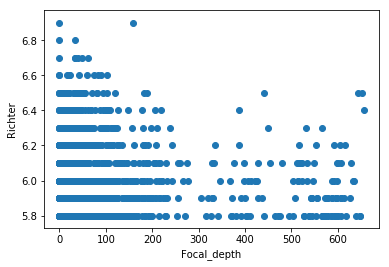

In [5]:
plt.scatter(df['Focal_depth'], df['Richter'])
plt.xlabel('Focal_depth')
plt.ylabel('Richter')

In [7]:
data=df[['Focal_depth', 'Richter']]

In [53]:
model1=KModes(
    n_clusters=2,
    init='Huang', #Huang,Cao,random
    n_init=3,
    verbose=True
)

In [54]:
model1.fit(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 33, cost: 3343.0
Run 1, iteration: 2/100, moves: 0, cost: 3343.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 25, cost: 3095.0
Run 2, iteration: 2/100, moves: 0, cost: 3095.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 3493.0
Best run was number 2


KModes(cat_dissim=<function matching_dissim at 0xa17d74a60>, init='Huang',
       max_iter=100, n_clusters=2, n_init=3, n_jobs=1, random_state=None,
       verbose=True)

In [55]:
y1=model1.labels_
print(Counter(y1))

Counter({0: 1759, 1: 419})


In [56]:
df_results = df.copy()
df_results['Results'] = y1
df_results.sort_values('Results')

,Focal_depth,Latitude,Longitude,Richter,Results
0,33,-52.26,28.30,6.7,0
1373,33,-27.97,-70.30,5.9,0
1372,70,-8.62,125.07,5.8,0
1371,34,42.84,78.60,6.1,0
1370,62,44.11,148.62,6.4,0
1366,82,44.70,148.17,6.1,0
1365,56,44.27,148.90,5.8,0
1364,45,44.09,148.68,5.8,0
1363,36,44.22,148.87,6.2,0
1362,53,43.99,148.91,5.9,0


Text(0, 0.5, 'Richter')

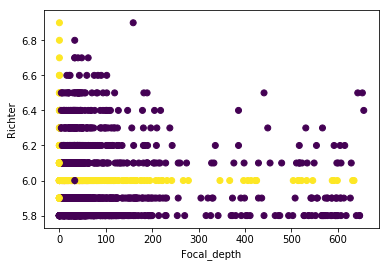

In [57]:
plt.scatter(df_results['Focal_depth'], df_results['Richter'], c=df_results['Results'])
plt.xlabel('Focal_depth')
plt.ylabel('Richter')

In [58]:
model2=DBSCAN(
    eps=0.9, #隣接点と見なす2点間の最大距離
    min_samples=10, #ボーダー点の最小個数
    metric='euclidean',  #距離の計算方法[string, or callable]
    algorithm='ball_tree' #{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
)

In [59]:
model2.fit(data)

DBSCAN(algorithm='ball_tree', eps=0.9, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [60]:
y2=model2.labels_
print(Counter(y2))

Counter({-1: 579, 3: 145, 0: 121, 17: 61, 38: 40, 34: 36, 1: 35, 9: 31, 33: 31, 10: 30, 46: 29, 25: 28, 31: 28, 42: 28, 21: 27, 37: 27, 56: 27, 2: 26, 19: 26, 40: 26, 51: 26, 6: 25, 14: 25, 16: 25, 29: 25, 32: 25, 8: 24, 15: 24, 28: 24, 13: 23, 35: 23, 18: 22, 5: 21, 23: 21, 61: 21, 43: 20, 49: 20, 50: 20, 20: 19, 44: 19, 54: 19, 12: 18, 36: 18, 48: 18, 4: 17, 24: 17, 26: 17, 27: 17, 39: 17, 41: 17, 22: 16, 30: 16, 52: 15, 7: 14, 55: 14, 58: 14, 47: 13, 59: 13, 11: 12, 60: 12, 45: 11, 53: 10, 57: 10})


In [61]:
df_results = df.copy()
df_results['Results'] = y2
df_results.sort_values('Results')

,Focal_depth,Latitude,Longitude,Richter,Results
1687,81,-5.68,151.47,6.0,-1
1656,110,42.48,142.15,6.4,-1
616,67,-0.36,124.73,6.0,-1
617,150,53.26,-170.53,5.8,-1
1650,229,29.28,128.10,6.1,-1
624,146,-42.28,-71.79,5.8,-1
1646,82,30.63,140.85,6.1,-1
1643,84,-21.40,169.87,6.0,-1
631,76,-25.40,-69.06,6.0,-1
1640,77,-21.35,-68.10,5.9,-1


Text(0, 0.5, 'Richter')

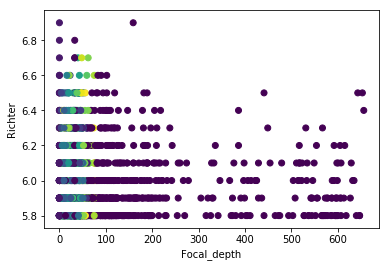

In [62]:
plt.scatter(df_results['Focal_depth'], df_results['Richter'], c=df_results['Results'])
plt.xlabel('Focal_depth')
plt.ylabel('Richter')

In [38]:
#各列に対して、平均値を引いたものを標準偏差で割と、行列の標準化を行う
dfs = df.iloc[:, 0:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,Focal_depth,Latitude,Longitude,Richter
0,-0.355119,-1.971545,-0.223888,3.815831
1,-0.329361,1.229900,0.807695,-0.935355
2,-0.149054,1.109424,0.739136,-0.935355
3,-0.063193,0.694961,0.725424,1.176283
4,-0.380877,-0.969764,0.966516,0.120464


In [39]:
#主成分分析の実行
pca = PCA()
feature = pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

In [40]:
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4
0,0.477155,3.215139,1.288964,-2.529342
1,-1.200360,-1.130702,-0.236112,0.610977
2,-0.995805,-1.123302,-0.139570,0.633509
3,-1.119578,0.565980,0.879926,-0.220885
4,0.004259,-0.415704,0.151736,-1.355847


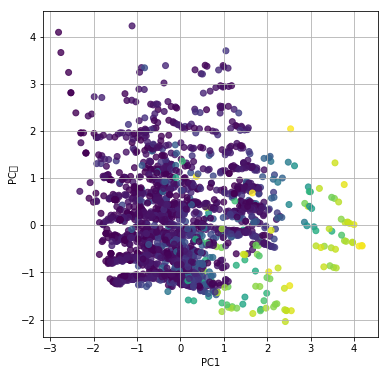

In [41]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC２")
plt.show()

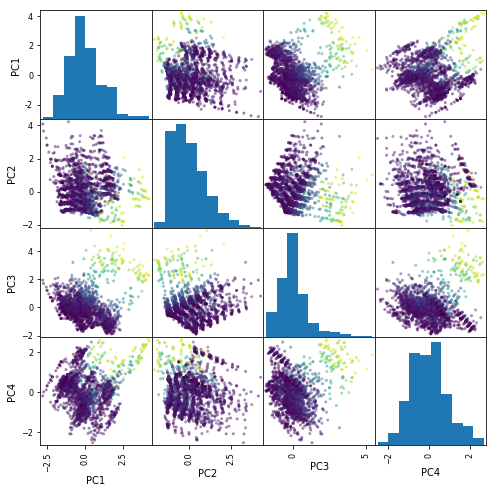

In [42]:
from pandas import plotting 
plotting.scatter_matrix(pd.DataFrame(feature, 
                        columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]), 
                        figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5) 
plt.show()

In [43]:
# 寄与率
pd.DataFrame(
    pca.explained_variance_ratio_,
    index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.301016
PC2,0.254569
PC3,0.243400
PC4,0.201015


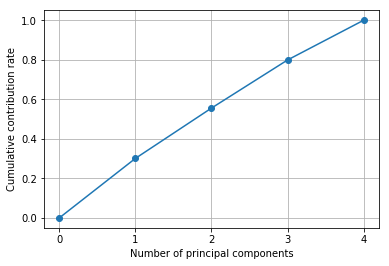

In [44]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [45]:
# PCA の固有値
pd.DataFrame(
    pca.explained_variance_,
    index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,1.204066
PC2,1.018276
PC3,0.973599
PC4,0.804059


In [46]:
# PCA の固有ベクトル
pd.DataFrame(
    pca.components_,
    columns=df.columns[0:],
    index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,Focal_depth,Latitude,Longitude,Richter
PC1,0.486264,-0.698413,-0.477488,-0.218568
PC2,-0.157812,0.025358,-0.567522,0.807695
PC3,0.752579,0.063689,0.459176,0.467680
PC4,0.415050,0.712405,-0.488960,-0.284835


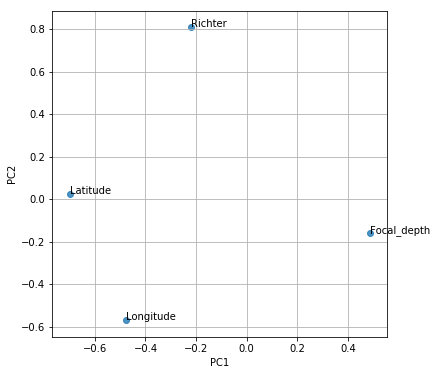

In [47]:
# 第一主成分と第四主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df.columns[0:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()